In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Activation Function (Step)
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [9]:
# Predict function
def perceptron_predict(X, weights):
    return step_function(np.dot(X, weights[1:]) + weights[0])

# Perceptron Algoritm
def perceptron_train(X, y, learning_rate=0.1, epochs=10):
    # Weight initialization
    weights = np.random.rand(X.shape[1] + 1)
    #vector de # Error vector
    errors = []

    # Entrenamiento
    for _ in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            # Calculate output (prediction)
            output = perceptron_predict(xi,weights)
            # Calculate absulute error
            error = target - output
            total_error += abs(error)
            # Update weights
            update = learning_rate * (target - output)
            weights[1:] += update * xi
            weights[0] += update
        errors.append(total_error)
    return weights,errors

In [10]:
# Input and Output data
# Input data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Expected Outputs for AND
y = np.array([0, 0, 0, 1])

In [11]:
# Train the perceptron
weights,errors = perceptron_train(X, y, learning_rate=0.1, epochs=10)
print("Pesos entrenados:", weights)

Pesos entrenados: [-0.4900426   0.17315966  0.38405163]


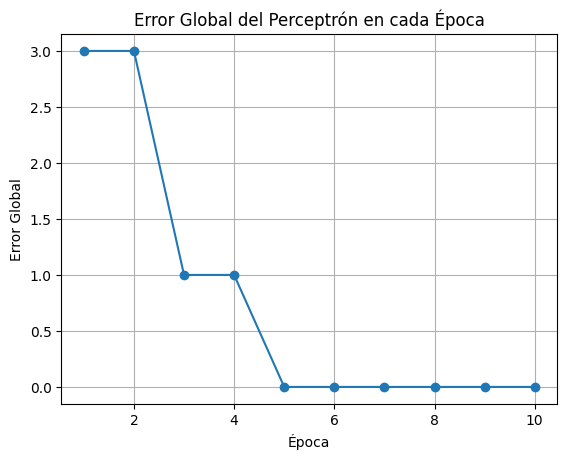

In [12]:
# Error graphic in each epoch
plt.figure(1)
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Época')
plt.ylabel('Error Global')
plt.title('Error Global del Perceptrón en cada Época')
plt.grid(True)

In [13]:
# Prove Perceptron with input data
for xi in X:
    prediction = perceptron_predict(xi, weights)
    print(f"Entrada: {xi}, Salida predicha: {prediction}")

Entrada: [0 0], Salida predicha: 0
Entrada: [0 1], Salida predicha: 0
Entrada: [1 0], Salida predicha: 0
Entrada: [1 1], Salida predicha: 1


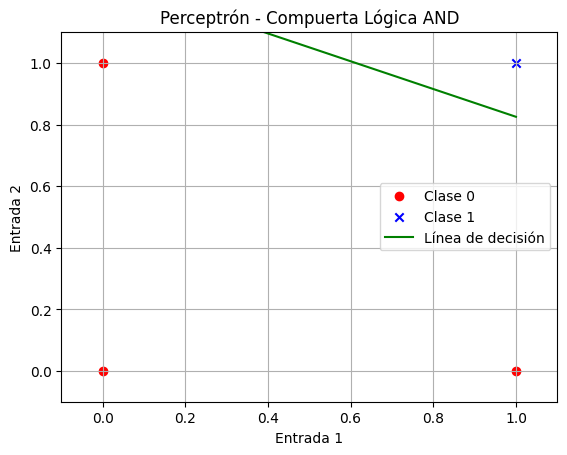

In [14]:
plt.figure(2)
# Graphic points of data
for i, xi in enumerate(X):
    if y[i] == 0:
        plt.scatter(xi[0], xi[1], color='red', marker='o', label='Clase 0' if i == 0 else "")
    else:
        plt.scatter(xi[0], xi[1], color='blue', marker='x', label='Clase 1' if i == 3 else "")

# Define decision line
x_values = np.array([0, 1])
y_values = -(weights[1] * x_values + weights[0]) / weights[2]

# Graphic decision line
plt.plot(x_values, y_values, label='Línea de decisión', color='green')

# Graphic config
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.legend()
plt.title('Perceptrón - Compuerta Lógica AND')
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.show()